<a href="https://colab.research.google.com/github/ShahinGanbar/QSS_tasks/blob/main/Week7_Day2_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [364]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [365]:
file_path = "/content/drive/MyDrive/Country-data (1).csv"

In [366]:
data = pd.read_csv(file_path)

df = pd.DataFrame(data)

In [367]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [369]:
cols = []
for col in df.columns:
  cols.append(col)

print(cols)

['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [370]:
df["country"].nunique()

167

In [371]:
df_ = df.drop("country",axis=1,inplace=False)

Checking Multicollinearity

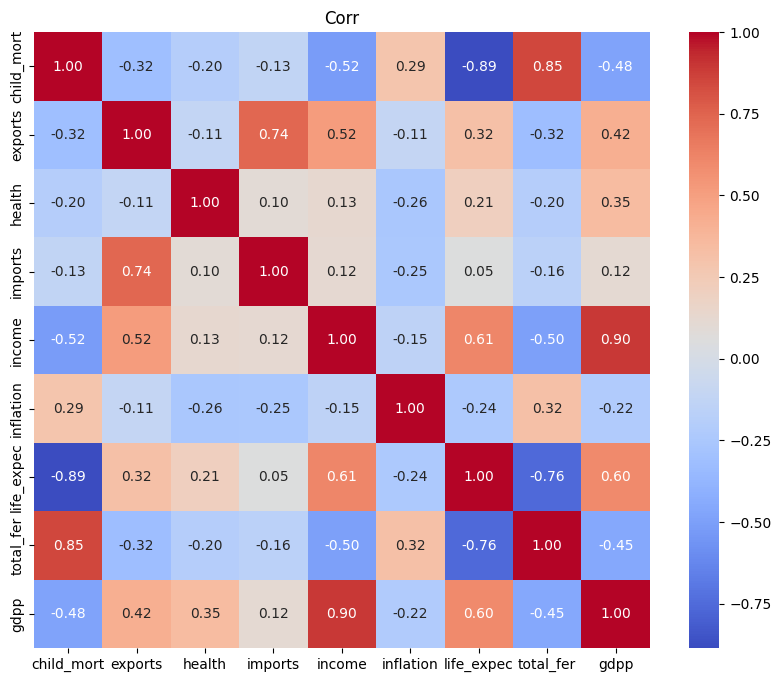

In [372]:
corr = df_.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f", square=True)
plt.title("Corr")
plt.show()

Variance Inflation Factor (VIF) - for comfirming multicollinearity

In [373]:

X = df_.copy()
X_scaled = StandardScaler().fit_transform(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)


      Feature       VIF
0  child_mort  7.366764
1     exports  4.940228
2      health  1.769698
3     imports  3.730585
4      income  7.585569
5   inflation  1.285318
6  life_expec  5.942384
7   total_fer  3.739481
8        gdpp  7.466164


In [374]:
X_original = X.copy()

Applying PCA to reduce multicollinearity

In [375]:
# apply pca

pca = PCA(n_components=4)
principal_components = pca.fit_transform(X_scaled)

# check variance ratio sum

print(pca.explained_variance_ratio_.sum())



0.8719078614023911


In [376]:
print(pca.explained_variance_ratio_)

[0.4595174  0.17181626 0.13004259 0.11053162]


In [377]:
df_pca = pd.DataFrame(data=principal_components,columns=["PC1","PC2","PC3","PC4"])

In [378]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [379]:
# plt.scatter(x=df_pca.values[:,0],y=df_pca.values[:,1])
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.show()

Kmeans

In [380]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_kmeans'] = kmeans.fit_predict(principal_components)


In [381]:
df["Cluster_kmeans"].value_counts()


# df[df["Cluster_kmeans"]==0].head() # developing
# df[df["Cluster_kmeans"]==1].head() # developed


,count
Cluster_kmeans,
0,84
2,47
1,36


In [382]:
df['Cluster_kmeans'].nunique()

3

In [383]:
# label cluster kmeans 0-> developing 1-> developed 2 -> under developing


df['Cluster_kmeans'] = df['Cluster_kmeans'].map({0: 'Developing',1: 'Developed',2: 'Under-Developing'})

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Under-Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Under-Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing


Hiererichal Method

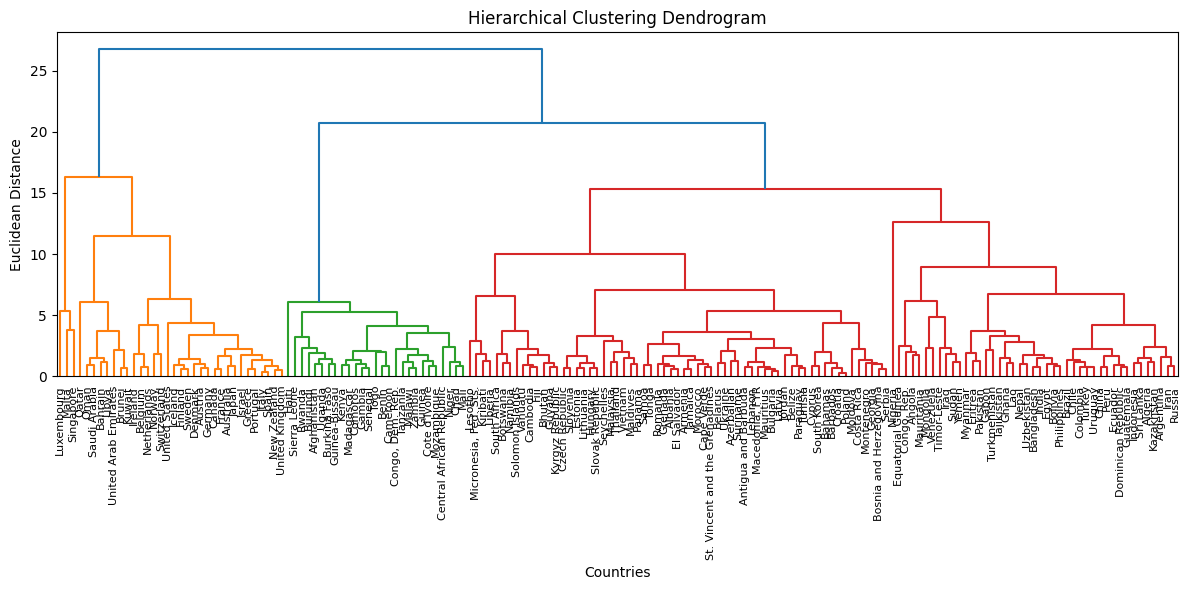

In [384]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=df['country'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()


In [385]:
from scipy.cluster.hierarchy import fcluster

# Set the threshold (t) just before the big distance jump
# Example: cut at distance = 17
cluster_labels = fcluster(linked, t=17, criterion='distance')

# Assign cluster labels to your DataFrame
df['Cluster_hiererichal'] = cluster_labels


# map cluster names 0-> developed... 1-> developing


# df['Cluster_hiererichal'] = df['Cluster_hiererichal'].map({0: 'Developing',1: 'Developed',2: 'Under-Developing'})






In [386]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_kmeans,Cluster_hiererichal
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Under-Developing,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Under-Developing,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,3


In [387]:
df.Cluster_hiererichal.value_counts()

,count
Cluster_hiererichal,
3,106
1,34
2,27


In [388]:
df["Cluster_hiererichal"] = df["Cluster_hiererichal"].map({
    1: "Developed",
    2: "Under-Developing",
    3: "Developed"
})


In [389]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_kmeans,Cluster_hiererichal
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Under-Developing,Under-Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developed
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developed
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Under-Developing,Developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developed


In [391]:
df[df["country"]=="Armenia"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_kmeans,Cluster_hiererichal
6,Armenia,18.1,20.8,4.4,45.3,6700,7.77,73.3,1.69,3220,Developing,Developed


In [393]:
from sklearn.metrics import silhouette_score

# For KMeans
silhouette_kmeans = silhouette_score(X_scaled, df['Cluster_kmeans'])
print(f"Silhouette Score KMeans: {silhouette_kmeans:.3f}")

# For Hierarchical clustering
silhouette_hier = silhouette_score(X_scaled, df['Cluster_hiererichal'])
print(f"Silhouette Score Hierarchical: {silhouette_hier:.3f}")


Silhouette Score KMeans: 0.283
Silhouette Score Hierarchical: 0.257
